In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from operator import attrgetter
from scipy.stats import iqr

# Meningkatkan Sales dengan me(re-Branding) Value Proposition Supermarket Kepada Churn Customers(Berhenti Berlangganan) Dengan Menggunakan Metode BMC(Business Model Canvas)

# **Latar Belakang**

Sebuah perusahaan yang bergerak di Industri ritel yang menjual barang daily consumers yaitu supermarket, Perusahaan ingin mengetahui evaluasi supermarket selama dua tahun terakhir. kemudian management meminta data analyst untuk memberikan insight dan rekomendasi, apa saja faktor yang harus di improvement untuk membangun customers relationship kepada customers serta meningkatkan sales. 

# **Rumusan Masalah**
Data analyst kemudian me(re-branding) value proposition supermarket dengan mengenarate beberapa faktor seperti People Segmentation, place purchase Overview, Promotion Performance serta RFM analisis yang ditujukan kepada customer churn (berhenti berlangganan). Informasi ini akan membantu data analyst faktor mana saja yang harus di improvement untuk meningkatkan Sales dan customers relationship serta kualitas layanan dari Supermarket.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

- Bagaimana Karakteristik segmentasi people yang yang sangat berpengaruh terhadap sales?
- Place Purchases mana yang trafic sales tertinggi?
- Apakah promotion yang sudah dilakukan efektif terhadap Sales?
- bagaimana kita membangun customers relationship kepada customers churn(berhenti berlangganan)


# DATA

**People**
- ID: Identifikasi unik pelanggan
- Year_Birth: Tahun kelahiran pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status perkawinan pelanggan
- Income: Pendapatan tahunan rumah tangga pelanggan
- Kidhome: Jumlah anak dalam rumah tangga pelanggan
- Teenhome: Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak
<br><br>

**Product**
- Wines_products: Jumlah uang yang dihabiskan untuk pembelian anggur dalam 2 tahun terakhir
- Fruits_Products: Jumlah uang yang dihabiskan untuk pembelian buah-buahan dalam 2 tahun terakhir
- Meat_Products: Jumlah uang yang dihabiskan untuk pembelian daging dalam 2 tahun terakhir
- Fish_Products: Jumlah uang yang dihabiskan untuk pembelian ikan dalam 2 tahun terakhir
- Sweet_Products: Jumlah uang yang dihabiskan untuk pembelian makanan manis dalam 2 tahun terakhir
- Gold_Products: Jumlah uang yang dihabiskan untuk pembelian emas dalam 2 tahun terakhir
<br><br>

**Promotion**
- NumDeals_Purchases: Jumlah pembelian yang dilakukan dengan diskon
- Campaign_1: 1 jika pelanggan menerima penawaran dalam kampanye pertama, 0 jika tidak
- Campaign_2: 1 jika pelanggan menerima penawaran dalam kampanye kedua, 0 jika tidak
- Campaign_3: 1 jika pelanggan menerima penawaran dalam kampanye ketiga, 0 jika tidak
- Campaign_4: 1 jika pelanggan menerima penawaran dalam kampanye keempat, 0 jika tidak
- Campaign_5: 1 jika pelanggan menerima penawaran dalam kampanye kelima, 0 jika tidak
- last_campaing: 1 jika pelanggan menerima penawaran dalam kampanye terakhir, 0 jika tidak

**Place**
- Web_Purchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- Catalog_Purchases: Jumlah pembelian yang dilakukan menggunakan katalog
- Store_Purchases: Jumlah pembelian yang dilakukan langsung di toko-toko
- Web_Visits_Month: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

In [2]:
df = pd.read_csv('Supermarket_Customers.csv', sep='\t',
                 dtype={'ID':str})


# Cleansing Data

## Menrubah Data ke date.time

disini saya melakukan merubah data yang tidak beraturan menjadi bentuk data type datetime sesuai default python.

In [3]:
df['date_customer'] = df['Dt_Customer'].apply(lambda x: '-'.join(x.split('-')[::-1]))

In [4]:
df['date_customer'] = pd.to_datetime(df['date_customer'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   object        
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Mengelompokan berdasarkan generasi kelahiran dan pendidikan

digunakan untuk mempermudah dalam dalam memvisualisasikan dan mengklasifikasikan data untuk kebutuhan EDA

### megkasifikasi berdasarkan generasi

mengelompokan generasi berdasarkan tahun kelahiran supaya saya memudahkan dalam mengkasifikasi beberapa kelompok berdasarkan kelompok kelahiranya.
data kellompok kelahiran saya ambil di website. https://www.brainacademy.id/blog/karakteristik-generasi-boomers-x-y-z-alpha

In [6]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)

In [7]:
# df['generasi_usia'] = df['Year_Birth'] == 1997

def classify_generasi(tahun_lahir):
    gen_a_start = 1946
    gen_a_end = 1964
    gen_x_start = 1965
    gen_x_end = 1976
    gen_y_start = 1977
    gen_y_end = 1994
    gen_z_start = 1995
    gen_z_end = 2010

    if tahun_lahir >= gen_a_start and tahun_lahir <= gen_a_end:
        hasil = 'Boomers'
    elif tahun_lahir >= gen_x_start and tahun_lahir <= gen_x_end:
        hasil = 'X'
    elif tahun_lahir >= gen_y_start and tahun_lahir <= gen_y_end:
        hasil = 'Y'
    elif tahun_lahir >= gen_z_start and tahun_lahir <= gen_z_end:
        hasil = 'Z'
    else:
        hasil = 'Elderly'
    return hasil

In [8]:
classify_generasi(1893)

'Elderly'

In [9]:
df['generasi'] = df['Year_Birth'].apply(classify_generasi)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date_customer,generasi
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,2012-09-04,Boomers
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2014-03-08,Boomers
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,2013-08-21,X
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,2014-02-10,Y
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,2014-01-19,Y


In [10]:
(df['generasi'] == 'Elderly').value_counts()

False    2213
True       27
Name: generasi, dtype: int64

In [11]:
len(df[df['generasi'] == 'Elderly'])

27

### Clasifikasi penedidikan

kemudian saya melakukan klasifikasi pendidikan ke dalam bentuk ordinal ini saya lakukan untuk mempermudah saya mencari korelasinya terhadap sales. 

In [12]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
def classify_education(pendidikan):
    

    if pendidikan == 'Basic':
        hasil = 1
    elif pendidikan == '2n Cycle':
        hasil = 2
    elif pendidikan == 'Graduation':
        hasil = 3
    elif pendidikan == 'Master':
        hasil = 4
    elif pendidikan == 'PhD':
        hasil = 5
    else:
        hasil = 'Unknow'
    return hasil

In [14]:
classify_education("PhD")

5

In [15]:
df['Class_education'] = df['Education'].apply(classify_education)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date_customer,generasi,Class_education
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,2012-09-04,Boomers,3
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,2014-03-08,Boomers,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,2013-08-21,X,3
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,2014-02-10,Y,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,2014-01-19,Y,5


In [16]:
df['Class_education'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [17]:
len(df[df['Income'].isna()])

24

### menyesuaikan Nama pendididkan dengan standart internasional

mengelompokan nama pendidikan sesuai standart internasional agar mudah dipahami para audiece 

In [18]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [19]:
# Merubah kata 'Graduation' menjadi 'Bachelor' pada kolom 'Keterangan'
df['Education'] = df['Education'].replace({'Graduation':'Bachelor','Basic':'Primary education'})

In [20]:
df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Primary education', '2n Cycle'],
      dtype=object)

## mengisi nilai gaji secara rata-rata berdasarkan generasi


- terdapat nilai kosong pada kolom income. disini saya mengisi data gaji customers berdasarkan 2 hal yang menurut saya paling berpengaruh.
- kemudian saya mengambil nilai korelasi yang paling tinggi

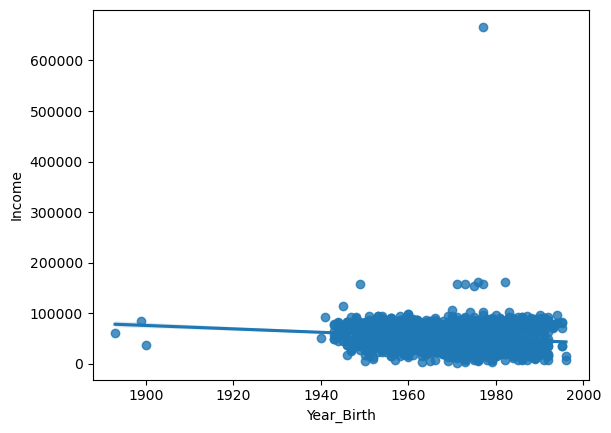

In [21]:
sns. regplot(data=df, x='Year_Birth', y='Income');

In [22]:
# korelasi berdasarkan generasi kelahiran
df['Year_Birth'].corr(df['Income'])

-0.16179142819632988

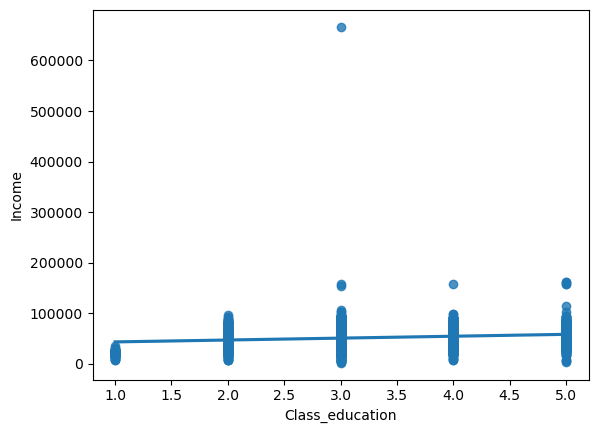

In [23]:
sns.regplot(data=df, x='Class_education', y='Income');

In [24]:
# korelasi berdasarkan pendidikan
df['Class_education'].corr(df['Income'], method='spearman')

0.15301871622204508

In [25]:
df['Income'] = df.groupby(['generasi'])['Income'].apply(lambda x: x.fillna(x.mean()))

# berdasarkan hasil corelasi analisis saya mengisi msiing value income berdasarkan generasi 
# karena korelasinya lebih tinggi daripada corelasi tingkat pendididkan, walaupun keduanya lemah

In [26]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
date_customer          0
generasi               0
Class_education        0
dtype: int64

## mengelompokan kelas ekonomi berdasarkan income

mengelompokan data income customers untuk memudahkan saya dalam mengkasifikasi customers. dalam melakukan klasifikasi saya menggunakan quantiles statistik.
Klasifikasi
- mengelompokan kelas ekonomi berdasarkan income dari data base. yaitu dibagi 4 kelas lower, middle, upper dan UltraRich
- lower = kuranng dari 25% data
- middle = antara 25% - 75%
- upper = diatas 75% -100%
- UltarRich = diatas 100%(outlieres)

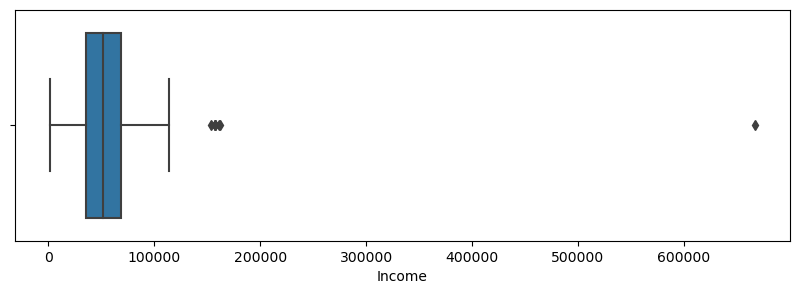

In [27]:
plt.figure(figsize=(10,3)) # mengatur ukuran figure/canvas
sns.boxplot(data=df, x='Income');

In [28]:
df['Income'].describe().round(2)

count      2240.00
mean      52258.33
std       25042.75
min        1730.00
25%       35538.75
50%       51371.00
75%       68289.75
max      666666.00
Name: Income, dtype: float64

ALASAN:
- melihat dari data diatas terdapat data outliere yang sedikit, maka saya akan menjadikan data outliere kelas income tersendiri.
- jika data outliere diabaikan maka saya bisa dengan mudah membagi 3 kelompok Income lainya.


In [29]:
# melihat nilai iqr
iqr(df['Income'])

32751.0

In [30]:
# melihat nilai batas atas
upper = df['Income'].describe()['75%'] + 1.5*iqr(df['Income']) 
upper

117416.25

In [31]:
df_1 = df.copy()

In [32]:
# mencari index outliere 
index_out = df_1[df_1['Income'] >= upper].index
index_out

Int64Index([164, 617, 655, 687, 1300, 1653, 2132, 2233], dtype='int64')

In [33]:
# menghapus index outliere
df_income = df_1.drop(index_out)

In [34]:
# untuk mengambil nilai kuantile
df_income['Income'].describe().round(2)

count      2232.00
mean      51651.35
std       20608.12
min        1730.00
25%       35434.75
50%       51277.00
75%       68118.00
max      113734.00
Name: Income, dtype: float64

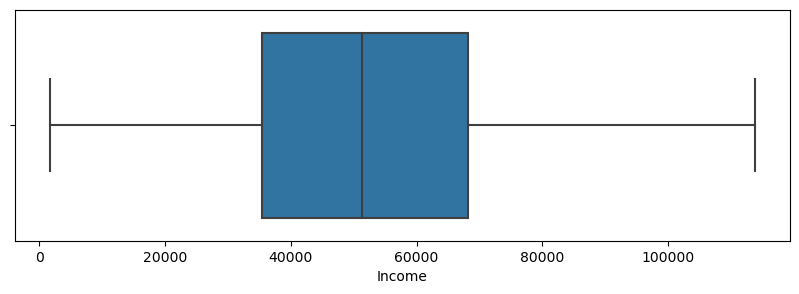

In [35]:

plt.figure(figsize=(10,3)) 
sns.boxplot(data=df_income, x='Income');

boxplot diatas menunjukan sudah tidak ada lagi data outliere

Klasifikasi
- mengelompokan kelas ekonomi berdasarkan income dari data base. yaitu dibagi 3 kelas lower, middle, upper
- lower = kuranng dari 25% data
- middle = antara 25% - 75%
- upper = diatas 75% -100%
- UltarRich = diatas 100%(outlieres)

In [36]:
# mengklasifikasikan data income
def classify_income(pendapatan):
    inc_bawah_awal = 0
    inc_bawah_akhir = df_income['Income'].describe().loc['25%']
    inc_tengah_awal = df_income['Income'].describe().loc['25%']
    inc_tengah_akhir = df_income['Income'].describe().loc['75%']
    inc_tinggi_awal = df_income['Income'].describe().loc['75%']
    inc_tinggi_akhir = df_income['Income'].describe().loc['max']

   
    if pendapatan >= inc_bawah_awal and pendapatan < inc_bawah_akhir:
        hasil = 'Lower'
    elif pendapatan >= inc_tengah_awal and pendapatan <= inc_tengah_akhir:
        hasil = 'Middle'
    elif pendapatan > inc_tinggi_awal and pendapatan <= inc_tinggi_akhir:
        hasil = 'Upper'
    elif pendapatan > inc_tinggi_akhir:
        hasil = 'UltraRich'
    else:
        hasil = 'None'
    return hasil

In [37]:
classify_income(113735)

'UltraRich'

In [38]:
# menambahkan kolom baru yang sudah di klasifikasikan
df['Class_Income'] = df['Income'].apply(classify_income)

In [39]:
df[df['Class_Income']=='UltraRich']

# terdapat 8 data ouliere yang saya kelompokan menjadi kelas tersendiri 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date_customer,generasi,Class_education,Class_Income
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,0,0,3,11,0,2014-03-01,X,5,UltraRich
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,0,0,3,11,0,2013-06-03,X,5,UltraRich
655,5555,1975,Bachelor,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,3,11,0,2014-02-07,X,3,UltraRich
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,0,0,3,11,0,2012-08-04,Y,5,UltraRich
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,0,0,3,11,0,2013-06-04,X,4,UltraRich
1653,4931,1977,Bachelor,Together,157146.0,0,0,29-04-2013,13,1,...,0,0,0,3,11,0,2013-04-29,Y,3,UltraRich
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,3,11,0,2013-08-29,Boomers,5,UltraRich
2233,9432,1977,Bachelor,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,3,11,0,2013-06-02,Y,3,UltraRich


## megelompokan data anak

disini saya mengkatagorikan kepemilikan anak menjadi beberapa katagori yaitu: No Child, Kids, Kids & Teen dan Teen

In [40]:
df_anak = df.copy()

In [41]:
# mengklasifikasikan data anak
def classify_child(baris):
    anak = baris[0]
    remaja = baris[1]

    if anak == 0 and remaja == 0 :
        hasil = 'No Child'
    elif anak >= 1 and remaja == 0:
        hasil = 'Kids'
    elif anak >= 1 and remaja >= 1:
        hasil = 'Kids & Teen'
    elif anak == 0 and remaja >= 1:
        hasil = 'Teen'
    else:
        hasil = 'None'
    return hasil

In [42]:
df_anak.loc[0, ['Kidhome',	'Teenhome']]

Kidhome     0
Teenhome    0
Name: 0, dtype: object

In [43]:
classify_child(df_anak.loc[0, ['Kidhome','Teenhome']])

'No Child'

In [44]:
# df_anak['Child'] = df_anak['Kidhome'] + ',' + df_anak['Teenhome']

In [45]:
df_anak[['Kidhome','Teenhome']].apply(classify_child)

Kidhome     Teen
Teenhome    Teen
dtype: object

In [46]:
df['child'] = df[['Kidhome','Teenhome']].apply(classify_child, axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   object        
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## menggurutkan kolom dan menghapus kolom yang tidak berkaitan.

In [48]:
# merubah value yang tidak jelas menjadi value yang dapat dibaca oleh audience

df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace({'Absurd': 'Unknown', 'YOLO': 'Unknown'})

In [49]:
df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Primary education', '2n Cycle'],
      dtype=object)

In [50]:
len(df.columns)

34

In [51]:
df_A = df.reindex(columns=['ID','Year_Birth','generasi','Education','Income',
                         'Class_Income','child','Marital_Status','date_customer','Recency','MntWines',
                         'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
                         'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases',
                         'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response',
                         'Complain','Z_CostContact', 'Z_Revenue','Dt_Customer',
                         'Kidhome','Teenhome','Class_education'])

# merubag sususnan kolom agar mudah dalam mengambil data untuk di analisis

In [52]:
len(df_A.columns)

34

In [53]:
df_A = df_A.rename(columns={'MntWines': 'Wines_Product',
                         'MntFruits':'Fruits_Product','MntMeatProducts':'Meat_Product', 'MntFishProducts': 'Fish_Product', 'MntSweetProducts': 'Sweet_Product','MntGoldProds':'Gold_Product', 
                         'NumDealsPurchases': 'Deals_Purchases', 'NumWebPurchases':'Web_Purchases','NumCatalogPurchases':'Catalog_Purchases', 'NumStorePurchases':'Store_Purchases','NumWebVisitsMonth':'Web_Visits_Month',
                         'AcceptedCmp1':'campaign_1','AcceptedCmp2':'campaign_2','AcceptedCmp3':'campaign_3', 'AcceptedCmp4':'campaign_4', 'AcceptedCmp5':'campaign_5','Response':'last_campaign'})

# Merubah nama kolom agar mudah dimengerti

In [54]:
df_Clean = df_A.drop (columns=['Z_CostContact' , 'Z_Revenue', 'Dt_Customer'])

# saya hapus karena nilainya sama semua dari semua ID 

In [55]:
len(df_Clean.columns)

31

## Data Clean

In [56]:
df_Clean.head()

,ID,Year_Birth,generasi,Education,Income,Class_Income,child,Marital_Status,date_customer,Recency,...,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign,Complain,Kidhome,Teenhome,Class_education
0,5524,1957,Boomers,Bachelor,58138.0,Middle,No Child,Single,2012-09-04,58,...,0,0,0,0,0,1,0,0,0,3
1,2174,1954,Boomers,Bachelor,46344.0,Middle,Kids & Teen,Single,2014-03-08,38,...,0,0,0,0,0,0,0,1,1,3
2,4141,1965,X,Bachelor,71613.0,Upper,No Child,Together,2013-08-21,26,...,0,0,0,0,0,0,0,0,0,3
3,6182,1984,Y,Bachelor,26646.0,Lower,Kids,Together,2014-02-10,26,...,0,0,0,0,0,0,0,1,0,3
4,5324,1981,Y,PhD,58293.0,Middle,Kids,Married,2014-01-19,94,...,0,0,0,0,0,0,0,1,0,5


# 1. EDA Sales by segmentation People

## 1.1 mencari Korelasi terkuat antar kolom terhapap jumlah repeat Order

meliahat banyaknya katagori di bagian People saya mencari korelasi yang terkuat terhadap Sales. hal ini supaya kita bisa fokus untuk menargetkan segment customers yang lebih tepat.



In [57]:
df_corr = df_Clean.copy()

In [58]:
# membuat kolom total anak untuk melihat korelasi terhadap total pembelian
df_corr['total_child'] = df_corr[['Kidhome', 'Teenhome']].sum(axis=1)

In [59]:
# membuat kolom total buy sebagai pembanding
df_corr['total_buy'] = df_corr[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].sum(axis=1)



In [60]:
df_corr['Class_Income'].unique()

array(['Middle', 'Upper', 'Lower', 'UltraRich'], dtype=object)

In [61]:
# menghapus data outliere untuk mendapatkan ststistika yang lebih presisi.
df_corr = df_corr.drop(df_corr[df_corr['Class_Income'] == 'UltraRich'].index)

In [62]:
# menghapus kolom2 yang tidak perlu
df_corr = df_corr.drop (columns=['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product', 'campaign_1', 'campaign_2','Web_Purchases',
       'Catalog_Purchases', 'Store_Purchases', 'Web_Visits_Month',
       'Deals_Purchases',
       'campaign_3', 'campaign_4', 'campaign_5','Kidhome', 'Teenhome','last_campaign'])

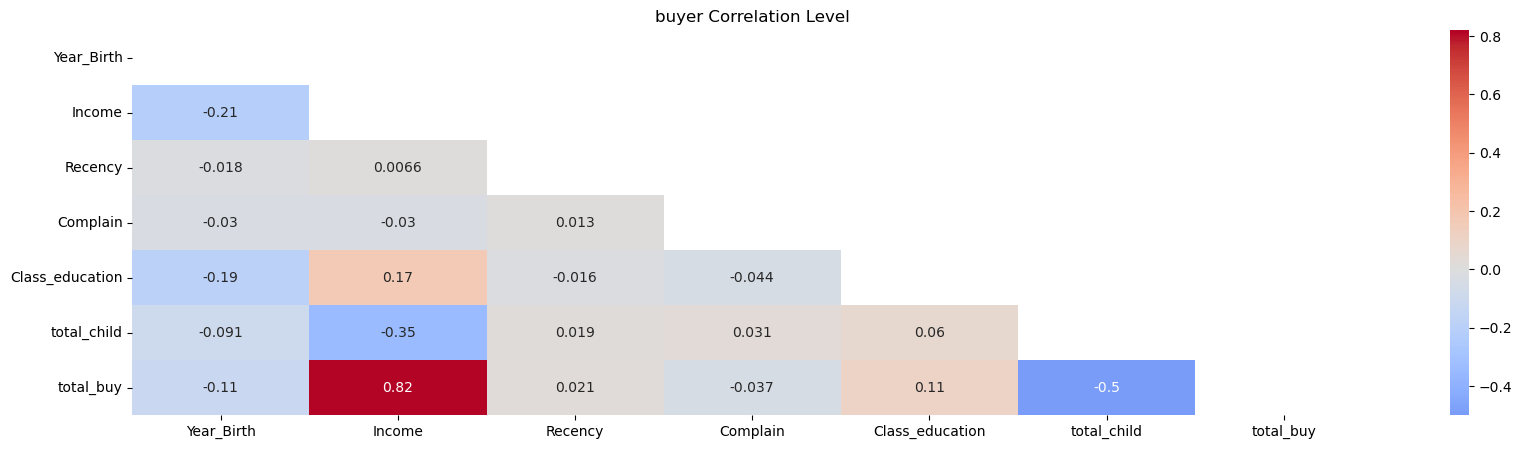

In [63]:
plt.figure(figsize=(20,5))
matrix = np.triu(df_corr.corr(method='spearman'))
sns.heatmap(
    data=df_corr.corr(),
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    mask = matrix
)
plt.title('buyer Correlation Level')
plt.show()


Demografic Buyer
- saya akan mengambil segmentasi customers berdasarakan Income karena dari semua segment demografic hanya segment income yang paling kuat(melebihi 0,7)
- saya juga membandingkan segment kepemilikan anak hanya sebagai refrensi untuk menambah sudut pandang (dipilih karena korelasio sedang/ terbesar ke-2 dari segment demografic)
- dari segment income saya mensubtitusi beberapa kelompok untuk mengetahui tingkatan income seseorang agar lebih mudah dalam mengelompokan customers. dengan rincian kelompok yaitu: Upper, middle, lower dan UltraRich



## 1.2 Analisis penjualan berdasarkan product yang terbeli

In [64]:
df_0 = df_Clean.copy()

In [65]:
kolom = ['Class_Income','Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']
df_0 = df_0.loc[:, kolom]

In [66]:
df_sum_0 = df_0.groupby('Class_Income').sum()[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].reset_index()
df_sum_0

,Class_Income,Wines_Product,Fruits_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product
0,Lower,12248,3304,12694,4821,3296,9412
1,Middle,308907,21323,116039,29531,20617,48476
2,UltraRich,212,36,4975,34,10,30
3,Upper,359449,34254,240260,49671,36698,40691


In [67]:
df_melt_0 = pd.melt(df_sum_0, id_vars=['Class_Income'], value_vars=['Wines_Product','Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
                                                            'Gold_Product'], 
                  var_name='Category', value_name='Nilai')

In [68]:
df_melt_0.head()

,Class_Income,Category,Nilai
0,Lower,Wines_Product,12248
1,Middle,Wines_Product,308907
2,UltraRich,Wines_Product,212
3,Upper,Wines_Product,359449
4,Lower,Fruits_Product,3304


**Total Sales For 2 years**

In [69]:
total = df_melt_0['Nilai'].sum()
total

1356988

**Total Sales For 2 years based Category**

In [70]:
bar_sales = df_melt_0.groupby(['Category']).sum()[['Nilai']]

bar_sales['persentage'] = (bar_sales['Nilai']/total)*100

bar_sales.round(2)

,Nilai,persentage
Category,,
Fish_Product,84057,6.19
Fruits_Product,58917,4.34
Gold_Product,98609,7.27
Meat_Product,373968,27.56
Sweet_Product,60621,4.47
Wines_Product,680816,50.17


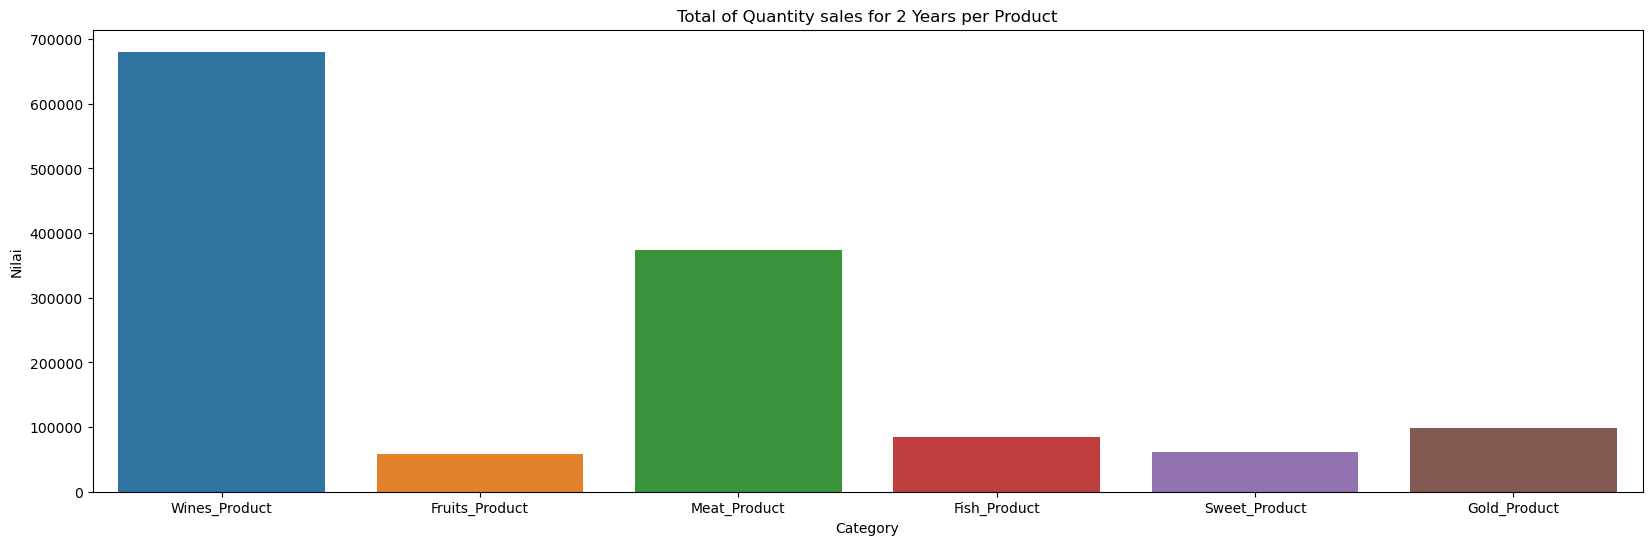

In [71]:
plt.figure( figsize=(20, 6))

sns.barplot(data=df_melt_0, x='Category', y='Nilai', estimator=np.sum, ci=0,)
plt.title('Total of Quantity sales for 2 Years per Product')
plt.show()

Insight:
- Total penjualan semua produk supermarket selama 2 tahun terakhir adalah 1.356.988
- Data table diatas menunjukan bahwa penjualan product wine mendominasi penjualan dengan total sales 680.816 kemuadian disusul dengan penjualan produk Meat dengan total Sales 373.968
- Dimana produk Wines menguasai hampir setengah dari penjualan supermarket selama 2 tahun terakhir. Produk wines dan meat dengan persentase 50,17% dan 27,5%

## 1.3 Analisi penjualan product berdasarkan kepemilikan anak

In [72]:
df_3 = df_Clean.copy()

In [73]:
df_sum_3 = df_3.groupby('child').sum()[['Wines_Product',
                                        'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
                                        'Gold_Product']].reset_index()
df_sum_3

,child,Wines_Product,Fruits_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product
0,Kids,42084,5169,25280,7509,5092,11480
1,Kids & Teen,55365,2813,20271,3930,3164,9501
2,No Child,310901,33404,237725,48837,33853,40927
3,Teen,272466,17531,90692,23781,18512,36701


In [74]:
kolom = ['child','Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']
df_3 = df_3.loc[:, kolom]

In [75]:
df_melt_3 = pd.melt(df_3, id_vars=['child'], value_vars=['Wines_Product','Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
                                                            'Gold_Product'], 
                  var_name='Category', value_name='Purchase')

In [76]:
df_2_clean = df_melt_3.reindex(columns=['Category','child','Purchase'])
B = df_2_clean
B.head()

,Category,child,Purchase
0,Wines_Product,No Child,635
1,Wines_Product,Kids & Teen,11
2,Wines_Product,No Child,426
3,Wines_Product,Kids,11
4,Wines_Product,Kids,173


In [77]:
df_ket = df_sum_3.copy()

df_ket['total'] = df_ket[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].sum(axis=1)

A = df_ket.sort_values('total',ascending=False)
A

,child,Wines_Product,Fruits_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product,total
2,No Child,310901,33404,237725,48837,33853,40927,705647
3,Teen,272466,17531,90692,23781,18512,36701,459683
0,Kids,42084,5169,25280,7509,5092,11480,96614
1,Kids & Teen,55365,2813,20271,3930,3164,9501,95044


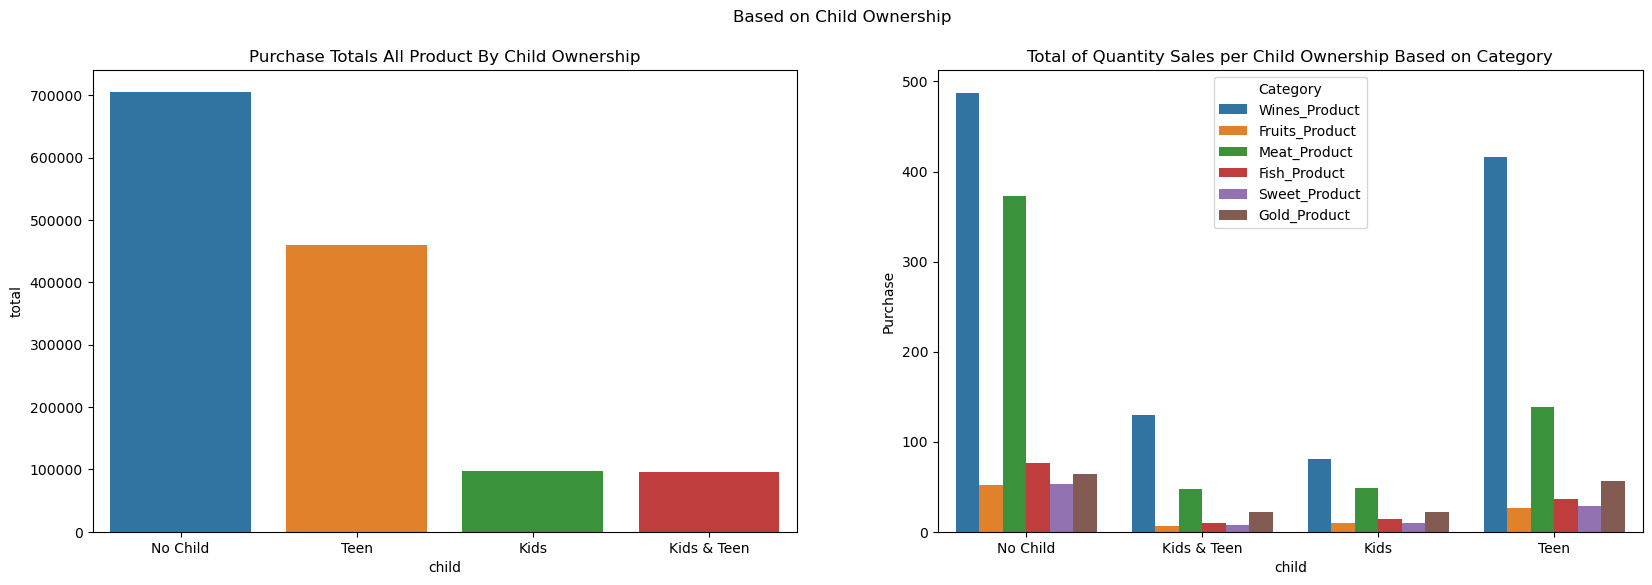

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(data= B,x='child',y='Purchase',ci=0,hue='Category',ax=axes[1])
sns.barplot(data=A,x='child',y='total',ci=0,ax=axes[0])
plt.suptitle('Based on Child Ownership')
axes[0].set_title('Purchase Totals All Product By Child Ownership')
axes[1].set_title('Total of Quantity Sales per Child Ownership Based on Category')

plt.show()

Insight:
- dari data diatas basis pembelian terbanyak berdasarakan segment customer tingkat kepemilikan anak adalah yang tidak memiliki anak. sedangkan sedangkan pada customers segment yang memiliki balita saja dan segment yang memiliki balita dan remaja pembelianya relative sama.
- pada segment tidak mempunyai anak & hanya mempunyai remaja saja pembelian terbanyak adalah produk wine setelah itu produk daging

## 1.4 Analisis penjualan berdasarkan income(Priority)

In [79]:
df_i = df_Clean.copy()

In [80]:
df_sum_i = df_i.groupby('Class_Income').sum()[['Wines_Product',
                                        'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
                                        'Gold_Product']].reset_index()
df_sum_i

,Class_Income,Wines_Product,Fruits_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product
0,Lower,12248,3304,12694,4821,3296,9412
1,Middle,308907,21323,116039,29531,20617,48476
2,UltraRich,212,36,4975,34,10,30
3,Upper,359449,34254,240260,49671,36698,40691


In [81]:
df_melt_i = pd.melt(df_sum_i, id_vars=['Class_Income'], value_vars=['Wines_Product','Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
                                                            'Gold_Product'], 
                  var_name='Category', value_name='Purchase')
df_melt_i.head()

,Class_Income,Category,Purchase
0,Lower,Wines_Product,12248
1,Middle,Wines_Product,308907
2,UltraRich,Wines_Product,212
3,Upper,Wines_Product,359449
4,Lower,Fruits_Product,3304


In [82]:
df_i_clean = df_melt_i.reindex(columns=['Category','Class_Income','Purchase'])
B = df_i_clean
B.head()

,Category,Class_Income,Purchase
0,Wines_Product,Lower,12248
1,Wines_Product,Middle,308907
2,Wines_Product,UltraRich,212
3,Wines_Product,Upper,359449
4,Fruits_Product,Lower,3304


In [83]:
df_ket = df_sum_i.copy()

df_ket['total'] = df_ket[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].sum(axis=1)

A = df_ket.sort_values('total',ascending=False)
A

,Class_Income,Wines_Product,Fruits_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product,total
3,Upper,359449,34254,240260,49671,36698,40691,761023
1,Middle,308907,21323,116039,29531,20617,48476,544893
0,Lower,12248,3304,12694,4821,3296,9412,45775
2,UltraRich,212,36,4975,34,10,30,5297


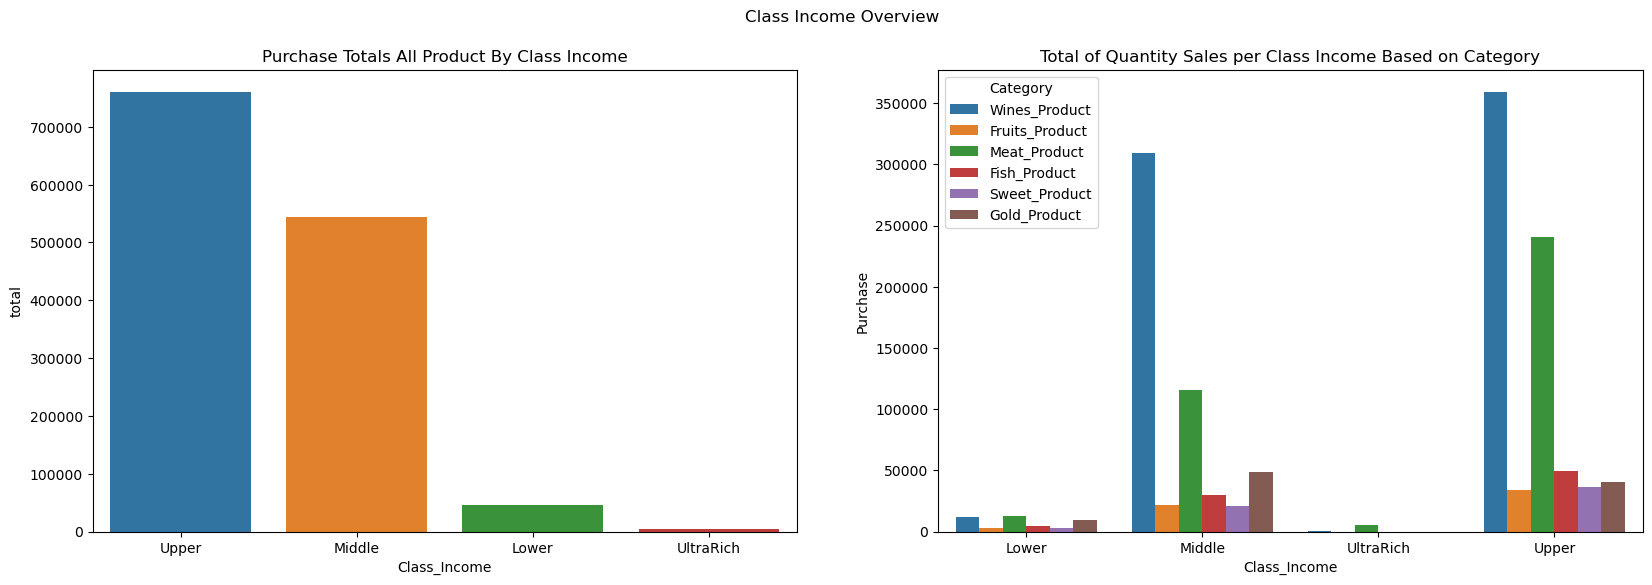

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(data= B,x='Class_Income',y='Purchase',ci=0,hue='Category',ax=axes[1])
sns.barplot(data=A,x='Class_Income',y='total',ci=0,ax=axes[0])
plt.suptitle('Class Income Overview')
axes[0].set_title('Purchase Totals All Product By Class Income')
axes[1].set_title('Total of Quantity Sales per Class Income Based on Category')

plt.show()

Insight: 
- dari tabel diatas kita bisa menarik kesimpulan bahwa basis customers dengan income upper dan middle sangat berpengaruh terhadap penjualan.
- Product yang sering di beli segment upper dan middle adalah wine product kemudian meat product
- selama 2 tahun terakhir kelompok upper berbelanja dengan total 761.032 item produk dengan rincian pembelian terbanyak produk wines dengan total 359.449 piece. kemudian produk yang sering dibeli kedua adalah produk meat dengan total 240.260 piece. 
- selama 2 tahun terakhir kelompok Middle berbelanja dengan total 544.893 item produk dengan rincian pembelian terbanyak produk wines dengan total 308.907 piece. kemudian produk yang sering dibeli kedua adalah produk meat dengan total 116.039 piece.
- selama 2 tahun terakhir kelompok lower berbelanja dengan total 45.775 item produk dengan rincian pembelian terbanyak produk meat dengan total 12.694 piece. kemudian produk yang sering dibeli kedua adalah produk wines dengan total 12.248 piece.
- selama 2 tahun terakhir kelompok lower berbelanja dengan total 5.297 item produk dengan rincian pembelian terbanyak produk meat dengan total 4.975 piece. kemudian produk yang sering dibeli kedua adalah produk wines dengan total 212 piece.


## 1.5 Mengetahui karakteristik demografic customers berdasarkan segment income 

### Spesifik demografic dari Class Icome upper

In [85]:
AB = df_Clean.copy()

In [86]:
AB = AB[AB['Class_Income']=='Upper']
AB.head()

,ID,Year_Birth,generasi,Education,Income,Class_Income,child,Marital_Status,date_customer,Recency,...,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign,Complain,Kidhome,Teenhome,Class_education
2,4141,1965,X,Bachelor,71613.0,Upper,No Child,Together,2013-08-21,26,...,0,0,0,0,0,0,0,0,0,3
15,2114,1946,Boomers,PhD,82800.0,Upper,No Child,Single,2012-11-24,23,...,1,0,0,0,1,1,0,0,0,5
18,6565,1949,Boomers,Master,76995.0,Upper,Teen,Married,2013-03-28,91,...,1,0,0,0,0,0,0,0,1,4
29,1966,1965,X,PhD,84618.0,Upper,No Child,Married,2013-11-22,96,...,0,0,0,0,1,0,0,0,0,5
34,8755,1946,Boomers,Master,68657.0,Upper,No Child,Married,2013-02-20,4,...,0,0,0,0,0,0,0,0,0,4


In [87]:
Persen_generasi = (AB['generasi'].value_counts(normalize=True) * 100).round(2)
Persen_generasi

Boomers    38.78
X          32.32
Y          26.39
Elderly     1.97
Z           0.54
Name: generasi, dtype: float64

In [88]:
Persen_Education = (AB['Education'].value_counts(normalize=True) * 100).round(2)
Persen_Education

Bachelor    54.76
PhD         22.80
Master      14.90
2n Cycle     7.54
Name: Education, dtype: float64

In [89]:
Persen_child = (AB['child'].value_counts(normalize=True) * 100).round(2)
Persen_child

No Child       69.48
Teen           23.16
Kids            3.77
Kids & Teen     3.59
Name: child, dtype: float64

In [90]:
Persen_Marital_Status = (AB['Marital_Status'].value_counts(normalize=True) * 100).round(2)
Persen_Marital_Status

Married     37.52
Together    25.85
Single      22.26
Divorced    10.59
Widow        3.59
Unknown      0.18
Name: Marital_Status, dtype: float64

In [91]:
print(f"berdasarkan customers dengan segment income Upper mempunyai karakteristik dominan seperti: ")
print(f"customers segment income Upper paling banyak pada generasi {Persen_generasi.idxmax()} dengan total {Persen_generasi.max()} %.")
print(f"kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan {Persen_Education.idxmax()} dengan total {Persen_Education.max()} %.")
print(f"kemudian pada kepemilikan anak paling banyak kepemilikan {Persen_child.idxmax()} dengan total {Persen_child.max()} %.")
print(f"dan pada status {Persen_Marital_Status.idxmax()} dengan total {Persen_Marital_Status.max()} %")

berdasarkan customers dengan segment income Upper mempunyai karakteristik dominan seperti: 
customers segment income Upper paling banyak pada generasi Boomers dengan total 38.78 %.
kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan Bachelor dengan total 54.76 %.
kemudian pada kepemilikan anak paling banyak kepemilikan No Child dengan total 69.48 %.
dan pada status Married dengan total 37.52 %


### Spesific demografic dari Class income Middle


In [92]:
df_m = df_Clean.copy()

In [93]:
df_m = df_m[df_m['Class_Income']=='Middle']
df_m.head()

,ID,Year_Birth,generasi,Education,Income,Class_Income,child,Marital_Status,date_customer,Recency,...,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign,Complain,Kidhome,Teenhome,Class_education
0,5524,1957,Boomers,Bachelor,58138.0,Middle,No Child,Single,2012-09-04,58,...,0,0,0,0,0,1,0,0,0,3
1,2174,1954,Boomers,Bachelor,46344.0,Middle,Kids & Teen,Single,2014-03-08,38,...,0,0,0,0,0,0,0,1,1,3
4,5324,1981,Y,PhD,58293.0,Middle,Kids,Married,2014-01-19,94,...,0,0,0,0,0,0,0,1,0,5
5,7446,1967,X,Master,62513.0,Middle,Teen,Together,2013-09-09,16,...,0,0,0,0,0,0,0,0,1,4
6,965,1971,X,Bachelor,55635.0,Middle,Teen,Divorced,2012-11-13,34,...,0,0,0,0,0,0,0,0,1,3


In [94]:
Persen_generasi = (df_m['generasi'].value_counts(normalize=True) * 100).round(2)
Persen_generasi

X          40.38
Boomers    39.12
Y          19.07
Elderly     1.43
Name: generasi, dtype: float64

In [95]:
Persen_Education = (df_m['Education'].value_counts(normalize=True) * 100).round(2)
Persen_Education

Bachelor    47.36
PhD         25.25
Master      19.07
2n Cycle     8.33
Name: Education, dtype: float64

In [96]:
Persen_child = (df_m['child'].value_counts(normalize=True) * 100).round(2)
Persen_child

Teen           44.05
Kids & Teen    27.04
Kids           15.94
No Child       12.98
Name: child, dtype: float64

In [97]:
Persen_Marital_Status = (df_m['Marital_Status'].value_counts(normalize=True) * 100).round(2)
Persen_Marital_Status

Married     39.21
Together    25.34
Single      20.23
Divorced    10.92
Widow        4.03
Unknown      0.27
Name: Marital_Status, dtype: float64

In [98]:
print(f"berdasarkan customers dengan segment income Middle mempunyai karakteristik dominan seperti: ")
print(f"customers segment income Middle paling banyak pada generasi {Persen_generasi.idxmax()} dengan total {Persen_generasi.max()} %.")
print(f"kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan {Persen_Education.idxmax()} dengan total {Persen_Education.max()} %.")
print(f"kemudian pada kepemilikan anak paling banyak kepemilikan {Persen_child.idxmax()} dengan total {Persen_child.max()} %.")
print(f"dan pada status {Persen_Marital_Status.idxmax()} dengan total {Persen_Marital_Status.max()} %")

berdasarkan customers dengan segment income Middle mempunyai karakteristik dominan seperti: 
customers segment income Middle paling banyak pada generasi X dengan total 40.38 %.
kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan Bachelor dengan total 47.36 %.
kemudian pada kepemilikan anak paling banyak kepemilikan Teen dengan total 44.05 %.
dan pada status Married dengan total 39.21 %


### Spesific demografic dari Class income Lower

In [99]:
df_l = df_Clean.copy()

In [100]:
df_l = df_l[df_l['Class_Income']=='Lower']
df_l.head()

,ID,Year_Birth,generasi,Education,Income,Class_Income,child,Marital_Status,date_customer,Recency,...,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign,Complain,Kidhome,Teenhome,Class_education
3,6182,1984,Y,Bachelor,26646.0,Lower,Kids,Together,2014-02-10,26,...,0,0,0,0,0,0,0,1,0,3
7,6177,1985,Y,PhD,33454.0,Lower,Kids,Married,2013-05-08,32,...,0,0,0,0,0,0,0,1,0,5
8,4855,1974,X,PhD,30351.0,Lower,Kids,Together,2013-06-06,19,...,0,0,0,0,0,1,0,1,0,5
9,5899,1950,Boomers,PhD,5648.0,Lower,Kids & Teen,Together,2014-03-13,68,...,0,0,1,0,0,0,0,1,1,5
11,387,1976,X,Primary education,7500.0,Lower,No Child,Married,2012-11-13,59,...,0,0,0,0,0,0,0,0,0,1


In [101]:
Persen_generasi = (df_l['generasi'].value_counts(normalize=True) * 100).round(2)
Persen_generasi

Y          42.29
X          38.17
Boomers    18.82
Z           0.72
Name: generasi, dtype: float64

In [102]:
Persen_Education = (df_l['Education'].value_counts(normalize=True) * 100).round(2)
Persen_Education

Bachelor             51.97
PhD                  13.08
Master               13.08
2n Cycle             12.19
Primary education     9.68
Name: Education, dtype: float64

In [103]:
Persen_child = (df_l['child'].value_counts(normalize=True) * 100).round(2)
Persen_child

Kids           57.17
Kids & Teen    18.64
No Child       18.28
Teen            5.91
Name: child, dtype: float64

In [104]:
Persen_Marital_Status = (df_l['Marital_Status'].value_counts(normalize=True) * 100).round(2)
Persen_Marital_Status

Married     38.35
Together    26.70
Single      23.84
Divorced     8.96
Widow        2.15
Name: Marital_Status, dtype: float64

In [105]:
print(f"berdasarkan customers dengan segment income Lower mempunyai karakteristik dominan seperti: ")
print(f"customers segment income Lower paling banyak pada generasi {Persen_generasi.idxmax()} dengan total {Persen_generasi.max()} %.")
print(f"kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan {Persen_Education.idxmax()} dengan total {Persen_Education.max()} %.")
print(f"kemudian pada kepemilikan anak paling banyak kepemilikan {Persen_child.idxmax()} dengan total {Persen_child.max()} %.")
print(f"dan pada status {Persen_Marital_Status.idxmax()} dengan total {Persen_Marital_Status.max()} %")

berdasarkan customers dengan segment income Lower mempunyai karakteristik dominan seperti: 
customers segment income Lower paling banyak pada generasi Y dengan total 42.29 %.
kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan Bachelor dengan total 51.97 %.
kemudian pada kepemilikan anak paling banyak kepemilikan Kids dengan total 57.17 %.
dan pada status Married dengan total 38.35 %


### Spesific demografic dari Class income UltaraRich

In [106]:
df_Ur = df_Clean.copy()

In [107]:
df_Ur = df_Ur[df_Ur['Class_Income']=='UltraRich']
df_Ur.head()

,ID,Year_Birth,generasi,Education,Income,Class_Income,child,Marital_Status,date_customer,Recency,...,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign,Complain,Kidhome,Teenhome,Class_education
164,8475,1973,X,PhD,157243.0,UltraRich,Teen,Married,2014-03-01,98,...,0,0,0,0,0,0,0,0,1,5
617,1503,1976,X,PhD,162397.0,UltraRich,Kids & Teen,Together,2013-06-03,31,...,0,0,0,0,0,0,0,1,1,5
655,5555,1975,X,Bachelor,153924.0,UltraRich,No Child,Divorced,2014-02-07,81,...,0,0,0,0,0,0,0,0,0,3
687,1501,1982,Y,PhD,160803.0,UltraRich,No Child,Married,2012-08-04,21,...,0,0,0,0,0,0,0,0,0,5
1300,5336,1971,X,Master,157733.0,UltraRich,Kids,Together,2013-06-04,37,...,0,0,0,0,0,0,0,1,0,4


In [108]:
Persen_generasi = (df_Ur['generasi'].value_counts(normalize=True) * 100).round(2)
Persen_generasi

X          50.0
Y          37.5
Boomers    12.5
Name: generasi, dtype: float64

In [109]:
Persen_Education = (df_Ur['Education'].value_counts(normalize=True) * 100).round(2)
Persen_Education

PhD         50.0
Bachelor    37.5
Master      12.5
Name: Education, dtype: float64

In [110]:
Persen_child = (df_Ur['child'].value_counts(normalize=True) * 100).round(2)
Persen_child

No Child       50.0
Kids           25.0
Teen           12.5
Kids & Teen    12.5
Name: child, dtype: float64

In [111]:
Persen_Marital_Status =(df_Ur['Marital_Status'].value_counts(normalize=True) * 100).round(2)
Persen_Marital_Status

Together    50.0
Married     37.5
Divorced    12.5
Name: Marital_Status, dtype: float64

In [112]:
print(f"berdasarkan customers dengan segment income UltraRich mempunyai karakteristik dominan seperti: ")
print(f"customers dengan segment income UltraRich paling banyak pada generasi {Persen_generasi.idxmax()} dengan total {Persen_generasi.max()} %.")
print(f"kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan {Persen_Education.idxmax()} dengan total {Persen_Education.max()} %.")
print(f"kemudian pada kepemilikan anak paling banyak kepemilikan {Persen_child.idxmax()} dengan total {Persen_child.max()} %.")
print(f"dan pada status {Persen_Marital_Status.idxmax()} dengan total {Persen_Marital_Status.max()} %")

berdasarkan customers dengan segment income UltraRich mempunyai karakteristik dominan seperti: 
customers dengan segment income UltraRich paling banyak pada generasi X dengan total 50.0 %.
kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan PhD dengan total 50.0 %.
kemudian pada kepemilikan anak paling banyak kepemilikan No Child dengan total 50.0 %.
dan pada status Together dengan total 50.0 %


# 2. EDA Sales by Place

## 2.1 Analisis Placement Purchase dengan trafic tertinggi dan place purchases dari segment income
 

In [113]:
df_PP = df_Clean.copy()

In [114]:
kolom = ['ID','Web_Purchases', 'Catalog_Purchases', 'Store_Purchases','Web_Visits_Month']
df_PP = df_PP.loc[:, kolom]

In [115]:
df_PP.head()

,ID,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Month
0,5524,8,10,4,7
1,2174,1,1,2,5
2,4141,8,2,10,4
3,6182,2,0,4,6
4,5324,5,3,6,5


In [116]:
df_melt_PP = pd.melt(df_PP, id_vars=['ID'], value_vars=['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases'], var_name='Place', value_name='Total')

In [117]:
df_melt_PP.head()

,ID,Place,Total
0,5524,Web_Purchases,8
1,2174,Web_Purchases,1
2,4141,Web_Purchases,8
3,6182,Web_Purchases,2
4,5324,Web_Purchases,5


mencari korelasi apakah Web_Visits_Month berpengaruh terhadap Web_Purchases

In [118]:
df_PP['Web_Visits_Month'].corr(df_PP['Web_Purchases'], method='spearman')

-0.09722232590644911

- berdasarkan data korelasi diatas menunjukan bahwa kunjungan website bulan terakhir tidak terlalu signifikan terhadap transaksi di website

**Mengetahui place purchases dari segment income**

In [119]:
df_pi = df_Clean.copy()

In [120]:
df_sum_pi = df_pi.groupby('Class_Income').sum()[['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']].reset_index()
df_sum_pi

,Class_Income,Web_Purchases,Catalog_Purchases,Store_Purchases
0,Lower,1127,265,1655
1,Middle,5022,2480,6602
2,UltraRich,4,79,6
3,Upper,2997,3139,4707


In [121]:
df_melt_pi = pd.melt(df_sum_pi, id_vars=['Class_Income'], value_vars=['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases'], 
                  var_name='Place', value_name='Total')
df_melt_pi.head()

,Class_Income,Place,Total
0,Lower,Web_Purchases,1127
1,Middle,Web_Purchases,5022
2,UltraRich,Web_Purchases,4
3,Upper,Web_Purchases,2997
4,Lower,Catalog_Purchases,265


In [122]:
df_pi_clean = df_melt_pi.reindex(columns=['Place','Class_Income','Total'])
B = df_pi_clean
B.head()

,Place,Class_Income,Total
0,Web_Purchases,Lower,1127
1,Web_Purchases,Middle,5022
2,Web_Purchases,UltraRich,4
3,Web_Purchases,Upper,2997
4,Catalog_Purchases,Lower,265


'Total of Transaction by Place Purchases for 2 yeras

In [123]:
df_melt_PP.groupby('Place').sum()['Total'].reset_index()

,Place,Total
0,Catalog_Purchases,5963
1,Store_Purchases,12970
2,Web_Purchases,9150


total of Transaction per Class Income based on place purchases

In [124]:
df_sum_pi

,Class_Income,Web_Purchases,Catalog_Purchases,Store_Purchases
0,Lower,1127,265,1655
1,Middle,5022,2480,6602
2,UltraRich,4,79,6
3,Upper,2997,3139,4707


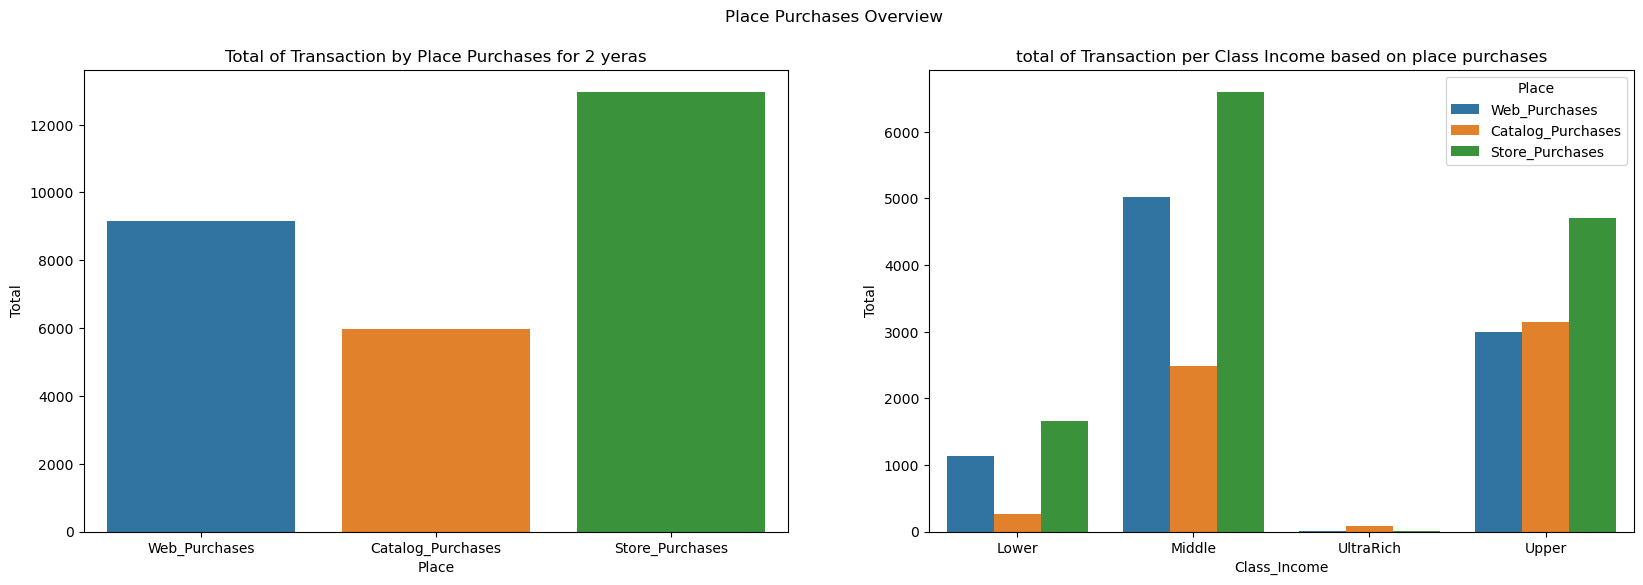

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(data= B,x='Class_Income',y='Total',estimator=np.sum,ci=0,hue='Place',ax=axes[1])
sns.barplot(data=df_melt_PP, x='Place', y='Total', estimator=np.sum, ci=0,ax=axes[0])
plt.suptitle('Place Purchases Overview')
axes[0].set_title('Total of Transaction by Place Purchases for 2 yeras')
axes[1].set_title('total of Transaction per Class Income based on place purchases')

plt.show()

insight:

- dari data jumlah transaksi place purchase menunjukan bahwa seseorang sering melakukan belanja di store dengan total 12970 transaksi. sedangkan di website dengan total 9150 transaksi. dan catalog dengan 5963 transaksi.
- data diatas menunjukan bahwa segment kelompok upper lebih suka berbelanja di store dengan 4.707 transaksi.
- sedangkan pada segment kelompok middle lebih suka berbelanja di Store dengan total 6602 transaksi. kemuadian berbelanja di website dengan 5022 transaksi.
- sedangkan pada segment kelompok lower lebih suka berbelanja di Store dengan total 1655 transaksi. kemuadian berbelanja di website dengan 1127 transaksi.
- sedangkan pada segment kelompok UltraRich lebih suka berbelanja di Catalog dengan total 79 transaksi.


## 2.2 mengukur daya beli customers dalam 1 kali transaksi

In [126]:
df_uji = df_Clean.copy()

In [127]:
kolom = ['ID','Class_Income','Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product', 'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases',
       'Web_Visits_Month',]
df_uji = df_uji.loc[:, kolom]
df_uji.head()

,ID,Class_Income,Wines_Product,Fruits_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Month
0,5524,Middle,635,88,546,172,88,88,8,10,4,7
1,2174,Middle,11,1,6,2,1,6,1,1,2,5
2,4141,Upper,426,49,127,111,21,42,8,2,10,4
3,6182,Lower,11,4,20,10,3,5,2,0,4,6
4,5324,Middle,173,43,118,46,27,15,5,3,6,5


In [128]:
df_uji['Total_Quntity'] = df_uji[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].sum(axis=1)

In [129]:
df_uji['Total_Placement'] = df_uji[['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']].sum(axis=1)

In [130]:
# saya drop karena tidak terjadi di place purchase manapun
df_uji = df_uji.drop(df_uji[df_uji['Total_Placement'] == 0].index)

In [131]:
df_uji['Basket_size'] = (df_uji['Total_Quntity'] / df_uji['Total_Placement']).round(2)

In [132]:
df_uji.head()

,ID,Class_Income,Wines_Product,Fruits_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product,Web_Purchases,Catalog_Purchases,Store_Purchases,Web_Visits_Month,Total_Quntity,Total_Placement,Basket_size
0,5524,Middle,635,88,546,172,88,88,8,10,4,7,1617,22,73.50
1,2174,Middle,11,1,6,2,1,6,1,1,2,5,27,4,6.75
2,4141,Upper,426,49,127,111,21,42,8,2,10,4,776,20,38.80
3,6182,Lower,11,4,20,10,3,5,2,0,4,6,53,6,8.83
4,5324,Middle,173,43,118,46,27,15,5,3,6,5,422,14,30.14


In [133]:
kolom = ['Class_Income','Basket_size']
df_uji = df_uji.loc[:, kolom]
df_uji.head()

,Class_Income,Basket_size
0,Middle,73.50
1,Middle,6.75
2,Upper,38.80
3,Lower,8.83
4,Middle,30.14


In [134]:
df_uji.groupby(by =['Class_Income']).mean()[['Basket_size']].round(0)

,Basket_size
Class_Income,
Lower,13.0
Middle,33.0
UltraRich,57.0
Upper,73.0


Text(0.5, 1.0, 'Average income Class Segment Buy the Product per Once Transaction')

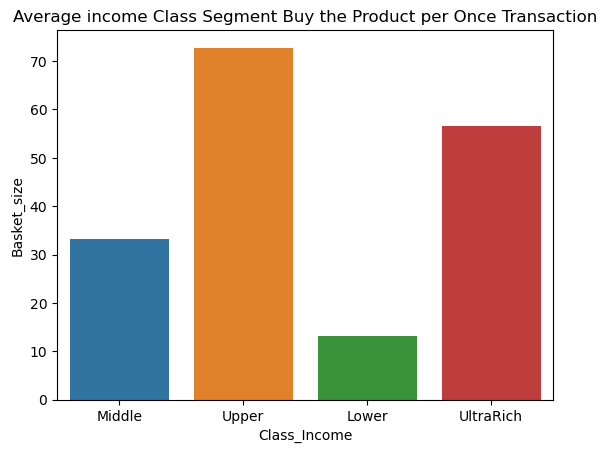

In [135]:
sns.barplot(data=df_uji, x='Class_Income', y='Basket_size', estimator=np.mean, ci=0);
plt.title('Average income Class Segment Buy the Product per Once Transaction')

Insight:
- dari data di atas menunjukan bahwa rata-rata dalam 1 transaksi kelompok income upper dapat membeli 73 piece. sedangkan kelompok income UltraRich dapat membeli 57 piece dalam 1 kali transaksi. sedangkan kelompok income Middle dapat membeli 33 piece dalam 1 kali transaksi dan kelompok income UltraRich dapat membeli 13 piece dalam 1 kali transaksi

## 2.3 Mengukur daya beli rata-rata customers per hari

In [136]:
df_inven  = df_Clean.copy()

In [137]:
kolom = ['ID','Class_Income','Recency', 'Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']
df_inven = df_inven.loc[:, kolom]

In [138]:
df_inven['total_sales'] = df_inven[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].sum(axis=1)

In [139]:
# menghitung daya beli kemampuan konsumen per harinya selama 2 tahun
# dengan cara:  total belanja selam 2 tahun dibagi 2 tahun(365hari x 2) - pembelian terakhir
# disini saya mengabaikan hari tutup toko.

df_inven['basket_size'] = (df_inven['total_sales'] / ((365*2) - df_inven['Recency'])).round(2)

In [140]:
df_mean_inven = df_inven.groupby('Class_Income').mean()['basket_size'].reset_index()
df_mean_inven.round(2)

,Class_Income,basket_size
0,Lower,0.12
1,Middle,0.72
2,UltraRich,0.96
3,Upper,2.01


Text(0.5, 1.0, 'Average Income Class Segment Buy the Product Per Day')

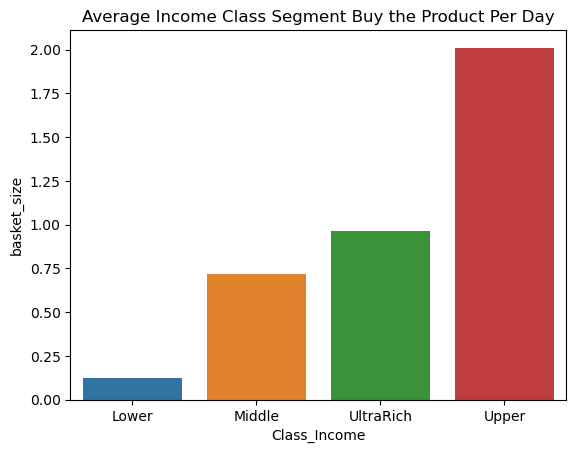

In [141]:
sns.barplot(data=df_mean_inven,x='Class_Income', y='basket_size',ci=0,)
plt.title('Average Income Class Segment Buy the Product Per Day')

Insight:
- berdasarakan table diatas menunjukan rata-rata daya beli tertinggi pada kelompok upper dengan 2 unit product perharinya
- sedangkan daya beli terendah pada kelompok lower 

# 3. EDA Sales by Promotion

## validasi faktor2 di bagian promotion

In [142]:
qw = df_Clean.copy()

In [143]:
A = qw[qw['Deals_Purchases']== 0]

In [144]:
kolom = ['ID','Deals_Purchases','campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign',]
A = A.loc[:, kolom]
A.head()

,ID,Deals_Purchases,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign
27,5255,0,0,0,0,0,0,0
77,7503,0,0,0,1,0,0,1
116,1592,0,1,0,0,0,1,0
124,7215,0,1,0,0,1,1,1
203,2798,0,1,0,0,1,1,1


In [145]:
qw['total_campaign'] = qw[['campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5','last_campaign']].sum(axis=1)

In [146]:
S = qw[qw['total_campaign']== 0]

In [147]:
kolom = ['ID','Deals_Purchases','total_campaign']
S = S.loc[:, kolom]
S

,ID,Deals_Purchases,total_campaign
1,2174,2,0
2,4141,1,0
3,6182,2,0
4,5324,5,0
5,7446,2,0
...,...,...,...
2232,8080,1,0
2233,9432,4,0
2234,8372,1,0
2235,10870,2,0


- menunjukan bahwa campaign yang diterima customers tidak melakukan pembelian dengan diskon, begitu juga pembelian dengan diskon belum tentu menerima campaign
- jadi 2 hal ini adalah metode promotion yang berbeda

## 3.1 Correlation Promotion based total Sales

In [148]:
df_corr_p = df_Clean.copy()

In [149]:
# merupakan kelompok outliere, karena kapasistas terhadap salesnya kecil.
df_corr_p = df_corr_p.drop(df_corr_p[df_corr_p['Class_Income'] == 'UltraRich'].index)

In [150]:
# membuat kolom total buy sebagai pembanding
df_corr_p['total_buy'] = df_corr_p[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].sum(axis=1)

In [151]:
# membuat kolom total campaign untuk melihat korelasi terhadap total pembelian
df_corr_p['total_campaign'] = df_corr_p[['campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5','last_campaign']].sum(axis=1)

In [152]:
df_corr_p = df_corr_p.drop(df_corr_p[df_corr_p['Class_Income'] == 'UltraRich'].index)

In [153]:
# hanya mengambil kolom2 yang diperlukan kolom2 yang tidak perlu
kolom = ['Deals_Purchases','total_campaign','total_buy']
df_corr_p = df_corr_p.loc[:, kolom]

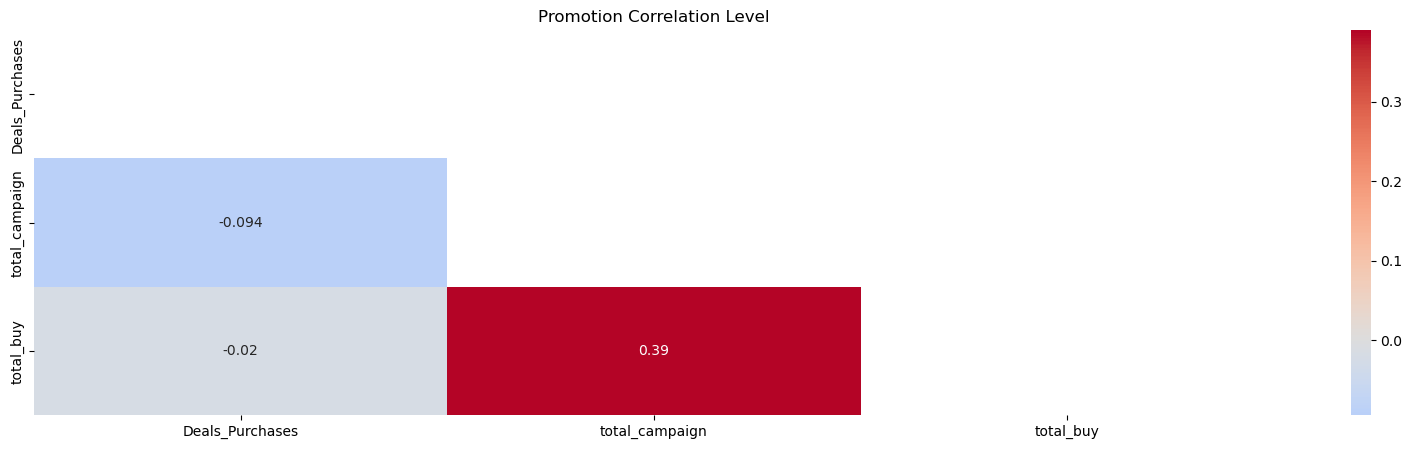

In [154]:
plt.figure(figsize=(20,5))
matrix = np.triu(df_corr_p.corr())
sns.heatmap(
    data=df_corr_p.corr(method='spearman'),
    annot = True,
    cmap = 'coolwarm',
    center = 0,
    mask = matrix,
    # method='spearman'
)
plt.title('Promotion Correlation Level')
plt.show()

Text(0.5, 1.0, 'Correlation Total Campaign vs Total Buy')

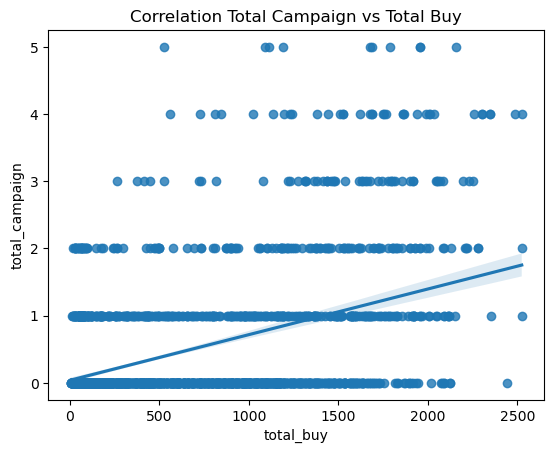

In [155]:
sns. regplot(data=df_corr_p, x='total_buy', y='total_campaign');
plt.title('Correlation Total Campaign vs Total Buy')

In [156]:
df_corr_p['Deals_Purchases'].corr(df_corr_p['total_buy'], method='spearman')

-0.019819894487156094

In [157]:
df_corr_p['total_campaign'].corr(df_corr_p['total_buy'], method='spearman')

0.39004708497797513

Dari Korelasi total campaing terhadap total buy ternyata korelasinya sedang 

- dari data ini kita bisa melihat pemeberian deals (diskon) tidak berpengaruh terhadap penjualan/ sales. karena korelasinya mendekati 0
- sedangkan dari Korelasi total campaing terhadap total buy ternyata korelasinya sedang (antara 0.3 -.07)
- disini managemnt bisa mendapatkan insight bahwa pemberian deals(diskon) tidak memberikan efek terhadap penjualan.
- kemuadian dari sisi total campaign korelasinya sedang terhadap penjualan. kemuadian saya mencari kenapa korelasinya sedang? apakah efektivitas campaign rendah?


## 3.2 Mengetahui mana campaing yang lebih efektif di terima oleh costumers.

In [158]:
df_Promotion = df_Clean.copy()

In [159]:
kolom = ['ID','campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign',]
df_Promotion = df_Promotion.loc[:, kolom]

In [160]:
df_melt_Promotion = pd.melt(df_Promotion, id_vars=['ID'], value_vars=['campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign'], var_name='Campaign', value_name='Total')
df_melt_Promotion.head()

,ID,Campaign,Total
0,5524,campaign_1,0
1,2174,campaign_1,0
2,4141,campaign_1,0
3,6182,campaign_1,0
4,5324,campaign_1,0


In [161]:
a = ((df_Promotion['campaign_1'].sum() / len(df_Promotion['campaign_1']))*100).round(2)
b = ((df_Promotion['campaign_2'].sum() / len(df_Promotion['campaign_2']))*100).round(2)
c = ((df_Promotion['campaign_3'].sum() / len(df_Promotion['campaign_3']))*100).round(2)
d = ((df_Promotion['campaign_4'].sum() / len(df_Promotion['campaign_4']))*100).round(2)
e = ((df_Promotion['campaign_5'].sum() / len(df_Promotion['campaign_5']))*100).round(2)
f = ((df_Promotion['last_campaign'].sum() / len(df_Promotion['last_campaign']))*100).round(2)


In [162]:
data = {'Campaign'                  : ['campaign_1', 'campaign_2','campaign_3', 'campaign_4', 'campaign_5', 'last_campaign'],
        'Effectiveness Campaign (%)': [a,b,c,d,e,f]}
df_data = pd.DataFrame(data)

** Mengetahui Segment dari Class Income mana yang mendapatkan Promotion **

In [163]:
df_Promotion_1 = df_Clean.copy()

In [164]:
df_Promotion_1['total_campaign'] = df_Promotion_1[['campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign',]].sum(axis=1)

In [165]:
kolom = ['Class_Income','campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign','total_campaign']
df_Promotion_1 = df_Promotion_1.loc[:, kolom]

In [166]:
df_Promotion_1

,Class_Income,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign,total_campaign
0,Middle,0,0,0,0,0,1,1
1,Middle,0,0,0,0,0,0,0
2,Upper,0,0,0,0,0,0,0
3,Lower,0,0,0,0,0,0,0
4,Middle,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,Middle,0,0,0,0,0,0,0
2236,Middle,1,0,0,0,0,0,1
2237,Middle,0,0,0,1,0,0,1
2238,Upper,0,0,0,0,0,0,0


In [167]:
df_sum_Promotion_1 = df_Promotion_1.groupby('Class_Income').sum()[['campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign']].reset_index()
df_sum_Promotion_1

,Class_Income,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign
0,Lower,0,0,43,1,0,58
1,Middle,23,14,77,88,10,125
2,UltraRich,0,0,0,0,0,0
3,Upper,121,16,43,78,153,151


In [168]:
df_melt_Promotion_1 = pd.melt(df_sum_Promotion_1, id_vars=['Class_Income'], 
                              value_vars=['campaign_1', 'campaign_2','campaign_3', 'campaign_4', 'campaign_5', 'last_campaign'], 
                              var_name='campaign', value_name='Total')
df_melt_Promotion_1.head()

,Class_Income,campaign,Total
0,Lower,campaign_1,0
1,Middle,campaign_1,23
2,UltraRich,campaign_1,0
3,Upper,campaign_1,121
4,Lower,campaign_2,0


Total of Acceptance Campaign per segment Income Class

In [169]:
df_sum_Promotion_1

,Class_Income,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,last_campaign
0,Lower,0,0,43,1,0,58
1,Middle,23,14,77,88,10,125
2,UltraRich,0,0,0,0,0,0
3,Upper,121,16,43,78,153,151


Effectiveness Acceptance Campaign Ratio

In [170]:
df_data

,Campaign,Effectiveness Campaign (%)
0,campaign_1,6.43
1,campaign_2,1.34
2,campaign_3,7.28
3,campaign_4,7.46
4,campaign_5,7.28
5,last_campaign,14.91


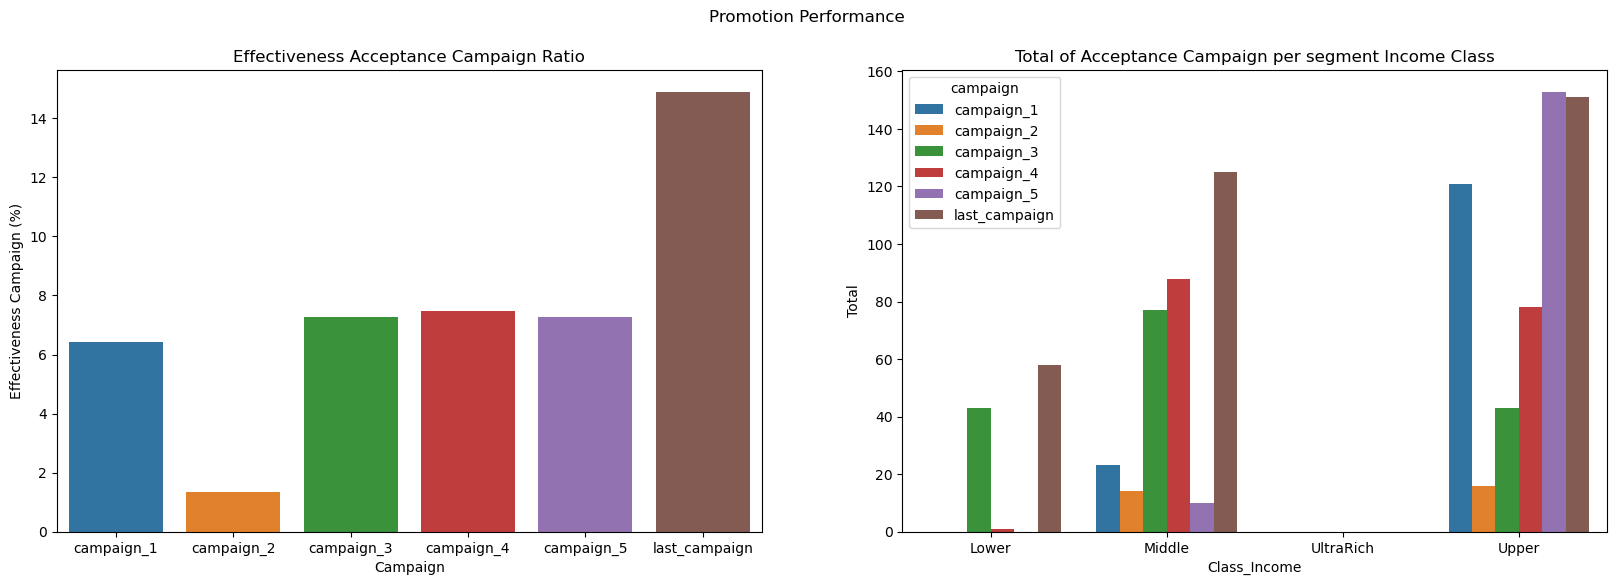

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(data=df_data,x='Campaign', y='Effectiveness Campaign (%)',ci=0,ax=axes[0])
sns.barplot(data= df_melt_Promotion_1,x='Class_Income',y='Total',estimator=np.sum,ci=0,hue='campaign',ax=axes[1])
plt.suptitle('Promotion Performance')
axes[0].set_title('Effectiveness Acceptance Campaign Ratio')
axes[1].set_title('Total of Acceptance Campaign per segment Income Class')

plt.show()

Insight:
- dari tabel 'Effectiveness Acceptance Campaign Ratio' bahwa campaiign secara keseluruhan efektivitasnya cukup rendah.
- pada campaign ke 2 mempunyai efektivitas paling rendah diantara campaign yang lainya.
- pada last campaign mempunyai efektivitas paling tinggi diantara campaign yang lainya.
- sedangkan campaign ke 3 samapai campaign ke 5 mempunyai efektivitas yang hampir sama.
<br><br>
-  dari table 'Total of Acceptance Campaign per segment Income Class' bahwa segment class income upper menerima campaign paling banyak secara keseluruhan. terutama pada campaign ke 5 dan last campaign.
- pada class income middle campaign terbanyak yang diterima adalah last campaign 
- pada class income UltraRich tidak mendapatkan campaign sama sekali.
- sedangkan class lower campaign paling banyak diterima pada last campaign dan campaign ke 5. 


# Analisis RFM

In [172]:
df_RFM = df_Clean.copy()

In [173]:
# monetary value di ambil dengan jumlah quantity produk yang dibeli
df_RFM['monetary_value'] = df_RFM[['Wines_Product',
       'Fruits_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product',
       'Gold_Product']].sum(axis=1)

# frequency di ambil dari data banyaknya transaksi
df_RFM['frequency'] = df_RFM[['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']].sum(axis=1)

In [174]:
kolom = ['ID','Recency','frequency','monetary_value']
RFM_table = df_RFM.loc[:, kolom]
RFM_table.head()

,ID,Recency,frequency,monetary_value
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


In [175]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,frequency,monetary_value
0.25,24.0,6.0,68.75
0.50,49.0,12.0,396.00
0.75,74.0,18.0,1045.50


In [176]:
quantiles

,Recency,frequency,monetary_value
0.25,24.0,6.0,68.75
0.50,49.0,12.0,396.00
0.75,74.0,18.0,1045.50


In [177]:
# Konversi kuantil ke dalam sebuah kamus, membuat penggunaan lebih mudah.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Argumen (x = nilai, p = Recency, nilai_moneter, frekuensi, d = kamus kuartil)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Argumen (x = nilai, p = Recency, nilai_moneter, frekuensi, d = kamus kuartil)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

### pelanggan Terbaik

In [178]:
#RFMClass = 444
best_Cust = RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False)

In [179]:
df_best = pd.merge(df_RFM, best_Cust, on='ID', how='inner')

In [180]:
len(df_best)

74

In [181]:
Persen_class_income = (df_best['Class_Income'].value_counts(normalize=True) * 100).round(2)
Persen_class_income

Upper        77.03
Middle       20.27
UltraRich     2.70
Name: Class_Income, dtype: float64

In [182]:
Persen_class_income[2]

2.7

In [183]:
print(f'Berdasarkan hasil analisis RFM untuk customers terbaik mempunyai jumlah total {len(df_best)} customers yang terdiri dari kelompok income')
print(f'paling banyak didominasi oleh kelompok income {Persen_class_income.index[0]} dengan total {Persen_class_income[0]} %')
print(f'selanjutnya oleh kelompok income {Persen_class_income.index[1]} dengan total {Persen_class_income[1]} %')
print(f'dan terakhir oleh kelompok income {Persen_class_income.index[2]} dengan total {Persen_class_income[2]} %')

Berdasarkan hasil analisis RFM untuk customers terbaik mempunyai jumlah total 74 customers yang terdiri dari kelompok income
paling banyak didominasi oleh kelompok income Upper dengan total 77.03 %
selanjutnya oleh kelompok income Middle dengan total 20.27 %
dan terakhir oleh kelompok income UltraRich dengan total 2.7 %


### Pelanggan yang berada di ambang churn (berhenti berlangganan/menggunakan layanan)(Goals)

In [184]:
# Pelanggan yang berada di ambang churn (berhenti berlangganan/menggunakan layanan)

Cust_Churn = RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False)

In [185]:
df_churn = pd.merge(df_RFM, Cust_Churn, on='ID', how='inner')

In [186]:
len(df_churn)

1118

In [187]:
Persen_class_income = (df_churn['Class_Income'].value_counts(normalize=True) * 100).round(2)
Persen_class_income

Middle       51.43
Upper        24.69
Lower        23.61
UltraRich     0.27
Name: Class_Income, dtype: float64

In [188]:
df_Persen_class_income = pd.DataFrame(Persen_class_income)

In [189]:
AB = df_Persen_class_income.reset_index().rename(columns={'Class_Income':'Persentage','index':'Class_Income'})


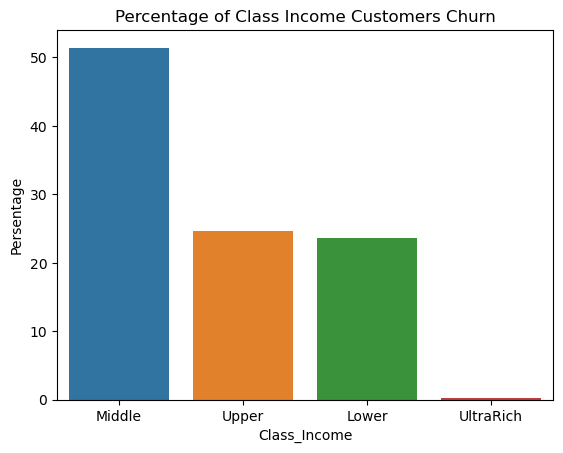

In [190]:

sns.barplot(data=AB, x='Class_Income',y='Persentage', ci=0)
plt.title('Percentage of Class Income Customers Churn')
plt.show()

In [191]:
print(f'Berdasarkan hasil analisis RFM untuk customers diambang Churn mempunyai jumlah total {len(df_churn)} customers yang terdiri dari kelompok income')
print(f'paling banyak didominasi oleh kelompok income {Persen_class_income.index[0]} dengan total {Persen_class_income[0]} %')
print(f'selanjutnya oleh kelompok income {Persen_class_income.index[1]} dengan total {Persen_class_income[1]} %')
print(f'kemudian oleh kelompok income {Persen_class_income.index[2]} dengan total {Persen_class_income[2]} %')
print(f'dan terakhir oleh kelompok income {Persen_class_income.index[3]} dengan total {Persen_class_income[3]} %')

Berdasarkan hasil analisis RFM untuk customers diambang Churn mempunyai jumlah total 1118 customers yang terdiri dari kelompok income
paling banyak didominasi oleh kelompok income Middle dengan total 51.43 %
selanjutnya oleh kelompok income Upper dengan total 24.69 %
kemudian oleh kelompok income Lower dengan total 23.61 %
dan terakhir oleh kelompok income UltraRich dengan total 0.27 %


In [192]:
df_eval = df_churn.copy()

In [193]:
kolom = ['Class_Income','Deals_Purchases', 'campaign_1','campaign_2', 'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign','Complain']
df_eval = df_eval.loc[:, kolom]
df_eval['total_campaign'] = df_eval[['campaign_1','campaign_2', 'campaign_3', 'campaign_4', 'campaign_5', 'last_campaign']].sum(axis=1)
kolom = ['Class_Income','total_campaign','Complain']
df_eval = df_eval.loc[:, kolom]
df_eval.groupby('Class_Income').mean()[['total_campaign','Complain']].round(1)

,total_campaign,Complain
Class_Income,,
Lower,0.1,0.0
Middle,0.3,0.0
UltraRich,0.0,0.0
Upper,0.9,0.0


Insight:
- dari data diatas menunjukan bahwa bahwa rata-rata acceptence campaing di class income middle hampir tidak pernah menerima campaign
- pada kelompok upper hanya menerima 1 kali campaign. padahal kelompok upper dan middle adalah kelompok dengan pembelian terbesar.

### pelanggan yang hilang 

In [194]:
# pelanggan yang hilang 

Cust_lost = RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False)

In [195]:
df_lost = pd.merge(df_RFM, Cust_lost, on='ID', how='inner')

In [196]:
len(df_lost)

143

In [197]:
Persen_class_income = (df_lost['Class_Income'].value_counts(normalize=True) * 100).round(2)
Persen_class_income

Lower        60.14
Middle       38.46
UltraRich     1.40
Name: Class_Income, dtype: float64

In [198]:
print(f'Berdasarkan hasil analisis RFM untuk customers yang hilang mempunyai jumlah total {len(df_lost)} customers yang terdiri dari kelompok income')
print(f'paling banyak didominasi oleh kelompok income {Persen_class_income.index[0]} dengan total {Persen_class_income[0]} %')
print(f'selanjutnya oleh kelompok income {Persen_class_income.index[1]} dengan total {Persen_class_income[1]} %')
print(f'dan terakhir oleh kelompok income {Persen_class_income.index[2]} dengan total {Persen_class_income[2]} %')

Berdasarkan hasil analisis RFM untuk customers yang hilang mempunyai jumlah total 143 customers yang terdiri dari kelompok income
paling banyak didominasi oleh kelompok income Lower dengan total 60.14 %
selanjutnya oleh kelompok income Middle dengan total 38.46 %
dan terakhir oleh kelompok income UltraRich dengan total 1.4 %


### pelanggan setia

In [199]:
# pelanggan setia

Cust_loyal = RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('monetary_value', ascending=False)

In [200]:
df_loyal = pd.merge(df_RFM, Cust_loyal, on='ID', how='inner')

In [201]:
len(df_loyal)

1106

In [202]:
Persen_class_income = (df_loyal['Class_Income'].value_counts(normalize=True) * 100).round(2)
Persen_class_income

Middle       50.63
Upper        47.92
Lower         1.18
UltraRich     0.27
Name: Class_Income, dtype: float64

In [203]:
print(f'Berdasarkan hasil analisis RFM untuk customers loyal mempunyai jumlah total {len(df_loyal)} customers yang terdiri dari kelompok income')
print(f'paling banyak didominasi oleh kelompok income {Persen_class_income.index[0]} dengan total {Persen_class_income[0]} %')
print(f'selanjutnya oleh kelompok income {Persen_class_income.index[1]} dengan total {Persen_class_income[1]} %')
print(f'kemudian oleh kelompok income {Persen_class_income.index[2]} dengan total {Persen_class_income[2]} %')
print(f'dan terakhir oleh kelompok income {Persen_class_income.index[3]} dengan total {Persen_class_income[3]} %')

Berdasarkan hasil analisis RFM untuk customers loyal mempunyai jumlah total 1106 customers yang terdiri dari kelompok income
paling banyak didominasi oleh kelompok income Middle dengan total 50.63 %
selanjutnya oleh kelompok income Upper dengan total 47.92 %
kemudian oleh kelompok income Lower dengan total 1.18 %
dan terakhir oleh kelompok income UltraRich dengan total 0.27 %


# Conclusion

**Berdasarkan kesimpulan dari EDA (Exploratory Data Analysis) pada bagian people**

- produk yang paling banyak dibeli oleh customers adalah produk **wines** kemuadian produk **Meat**. sedangkan produk sweet dan fruit paling sedikit di beli.
- kesimpulan bahwa basis customers dengan income **upper** dan **middle** sangat berpengaruh terhadap penjualan.
- **Product yang sering di beli segment upper dan middle adalah wine product kemudian meat product**

    1. selama 2 tahun terakhir kelompok **upper** berbelanja dengan total 761.032 item produk dengan rincian pembelian terbanyak produk wines dengan total 359.449 piece. kemudian produk yang sering dibeli kedua adalah produk meat dengan total 240.260 piece. 
    2. selama 2 tahun terakhir kelompok **Middle** berbelanja dengan total 544.893 item produk dengan rincian pembelian terbanyak produk wines dengan total 308.907 piece. kemudian produk yang sering dibeli kedua adalah produk meat dengan total 116.039 piece.
    

    <br>
- **berikut informasi karakteristik dari customers dengan kelompok income Upper dan Middle:**
    <br>

    1. berdasarkan customers dengan segment **income Upper** mempunyai karakteristik dominan seperti: 
    customers segment income Upper paling banyak pada generasi Boomers dengan total 38.78 %.
    kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan Bachelor dengan total 54.76 %.
    kemudian pada kepemilikan anak paling banyak kepemilikan No Child dengan total 69.48 %.
    dan pada status Married dengan total 37.52 %

    2. berdasarkan customers dengan segment **income Middle** mempunyai karakteristik dominan seperti: 
    customers segment income Middle paling banyak pada generasi X dengan total 40.38 %.
    kemudian untuk tingkat pendidikan paling banyak pada tingkat pendididkan Bachelor dengan total 47.36 %.
    kemudian pada kepemilikan anak paling banyak kepemilikan Teen dengan total 44.05 %.
    dan pada status Married dengan total 39.21 %




**Berdasarkan kesimpulan dari EDA (Exploratory Data Analysis) pada bagian Place Purchases**
- Transaksi place purchase menunjukan bahwa seseorang sering melakukan belanja di store dengan total 12970 transaksi. sedangkan di website dengan total 9150 transaksi. dan catalog dengan 5963 transaksi.
- bahwa segment kelompok upper lebih suka berbelanja di store dan website dibandingan catalog dan website.
- sedangkan pada segment kelompok middle lebih suka berbelanja di Store. kemuadian berbelanja di website.
- menunjukan bahwa rata-rata dalam 1 transaksi kelompok income upper dapat membeli 73 piece. sedangkan kelompok income Middle dapat membeli 33 piece dalam 1 kali transaksi.
- berdasarakan table diatas menunjukan rata-rata daya beli tertinggi pada kelompok upper dengan 2 unit product perharinya
- sedangkan daya beli terendah pada kelompok lower 

**Berdasarkan kesimpulan dari EDA (Exploratory Data Analysis) pada bagian Promotion**

- pemeberian deals (diskon) tidak berpengaruh terhadap penjualan/ sales. karena korelasinya mendekati 0
- sedangkan dari Korelasi total campaing terhadap total buy ternyata korelasinya sedang (antara 0.3 -.07)
- dari tabel 'Effectiveness Acceptance Campaign Ratio' bahwa campaiign secara keseluruhan efektivitasnya cukup rendah.
<br><br>
-  dari table 'Total of Acceptance Campaign per segment Income Class' bahwa segment class income upper menerima campaign paling banyak secara keseluruhan. terutama pada campaign ke 5 dan last campaign.
- pada class income middle campaign terbanyak yang diterima adalah last campaign 
 


**Berdasarkan kesimpulan dari RFM analisis (Recency, Frequency, Monetary values)**


- Berdasarkan hasil analisis RFM untuk **customers diambang Churn**(customers berhenti berlangganan) mempunyai jumlah total 1118 customers yang terdiri dari kelompok income
paling banyak didominasi oleh kelompok income Middle dengan total 51.43 %
selanjutnya oleh kelompok income Upper dengan total 24.69 %
kemudian oleh kelompok income Lower dengan total 23.61 %
dan terakhir oleh kelompok income UltraRich dengan total 0.27 %
    - dari data diatas menunjukan bahwa bahwa rata-rata acceptence campaing di slass income miiddle hampir tidak pernah menerima campaign
    - pada kelompok upper hanya menerima 1 kali campaign. padahal kelompok upper dan middle adalah kelompok dengan pembelian terbesar.
    <br><br>


# Recommendation

link BMC:
<br>
https://drive.google.com/file/d/1g_AnqZub58Wu8f7S5FlSFYKj7WBZyG0p/view?usp=sharing

1. Customer Segments
    - Pelanggan yang berada di ambang churn (berhenti berlangganan/menggunakan layanan) pada kelas Income **Upper dan Middle**. Karena 2 kelas income ini sanggat berkontribusi terhadap penjualan selama 2 tahun terakhir.
2. Value Propositions
    - **Menyediakan berbagai daily consumer product yang selalu tersedia khususnya product wines dan meat dengan penawaran -penawaran yang menarik serta memberikan kenyamanan berbelanja kepada konsumen**.
3. Customer Relationships
    - Campaign Ke customer churn dengan kelas income middle dan upper. Karena dari data bahwa kelas **middle** hampir tidak pernah menerima campaign
4. Channels  
    - konsumen kelas Upper dan Middle lebih suka berbelanja di **Store**. Kemuadian pada media belanja di **website** kualitas layanan bisa lebih ditingkatkan karena pada kelas middle transaksinya di website paling tinggi dibandingkan kelas lainya.
5. Key Activities
    - Tim marketing lebih **aware** terhadap customers churn pada kelas **middle dan Upper**. Dengan memberikan campaign yang lebih intensif.Inventory control terhadap produk2 yang produk2 yang sering dibeli terutama produk **Wines dan Meat**.
6. Key Partners
    - Supplier product yang menyediakan produk dengan kwalitas baik.
    - Mencari agency campaign yang lebih baik karena efektivitas penerimaan campaing kepada customers masih rendah.
7. Key Resources
    - Human resources marketing yang handal
    - Storage and distribution system.
8. Revenue Streams
    - menjual produk konsumen sehari-hari (selling daily consumer product)
9. Cost Structure
    -	Biaya oprasional
    -	Biaya diskon yang diberikan
    -	Biaya campaig  
    -	Biaya depresiasi dan amortisasi supermarket.
